In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
nasData = pd.read_csv("NAS.csv")
nasData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nasData = nasData.dropna(axis="rows")
nasData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [19]:
inputData = nasData.Date
inputData.head(10)

0     2003-12-18
1     2003-12-19
2     2003-12-22
3     2003-12-23
7     2003-12-29
8     2003-12-30
11    2004-01-02
12    2004-01-05
13    2004-01-06
14    2004-01-07
Name: Date, dtype: object

In [5]:
closingPrice = nasData['Adj Close']
closingPrice

0       19.139799
1       18.454201
2       18.054300
3       17.425800
7       17.254400
          ...    
4248     0.676800
4249     0.600600
4250     0.626000
4251     0.605000
4252     0.610600
Name: Adj Close, Length: 4218, dtype: float64

In [6]:
#nasData.plot.scatter(x='Date',y='Adj Close')

In [7]:
modell = linear_model.LinearRegression()

In [8]:
type(inputData[0])

str

In [9]:
import datetime as dt

In [10]:
dato = nasData['Date']

In [11]:
dato = pd.to_datetime(dato)
dato = dato.map(dt.datetime.toordinal)

In [12]:
dato = dato.to_frame()
dato

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
...,...
4248,737710
4249,737711
4250,737712
4251,737713


In [13]:
type(dato)

pandas.core.frame.DataFrame

In [14]:
type(closingPrice)

pandas.core.series.Series

In [15]:
modell.fit(dato,closingPrice)

LinearRegression()

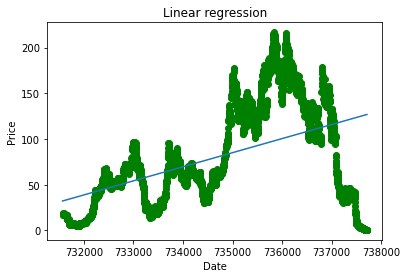

In [17]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato,closingPrice, color = 'green')
plt.plot(dato, modell.predict(dato))
plt.show()

In [28]:
def convertDate(string):
    date = pd.to_datetime(string)
    return dt.datetime.toordinal(date)

In [29]:
x = '2021-05-16'
convertDate(x)

737926

In [30]:
modell.predict([[convertDate(x)]])

array([130.13282895])